# How often have I ridden my bikes? <img style="float: right;" src="./img/profile.jpg" alt="my Strava Profile image of me laughing while riding a road bike on an indoor trainer" width="100" height="100"/>

| My Strava Cycling archive | Date & Time Cycles | Years & Kids | Maybe... some Sunrise history   |
|------|------|------|------|
|  Ride Times  |  Morning, Noon, Night  |  Peaks & flows  |  Was I pedaling?  |  


In [430]:
# Load the Python packages we'll use
import pandas as pd
import numpy as np
import datetime
import time
import math

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

# Set a limit for rows displayed in output
#pd.options.display.max_rows = 10

##### With that aside, emojis help with learning anything, so let's incorporate those here. _(Optional + Fun)_

Install the emoji package using pip.
Details about it at [Emoji for Python](https://pypi.org/project/emoji/)

Open a new Terminal window (Mac) or Command Line (Windows). I'm not tech savvy enough to give instructions to anyone on Linux so those of you know what to do.

Enter the command 
(text following dollar sign only, which is standard syntax for Mac Terminal prompts):

$ pip install emoji --upgrade

In [431]:
# back in Jupyter Notebook/Python import and test the package
import emoji
print(emoji.emojize('Sunrises are worth waking up for! So are bike rides! :thumbs_up:'))

Sunrises are worth waking up for! So are bike rides! 👍


### Now get some time based activity data.

In my case, I use [Strava](https://www.strava.com/) which supports socially celebrating your and your friends' physical endeavors in many different disciplines. Strava has pretty good privacy so you can generally only download your own, or beg friends or spouses for their data in exchange for really cool insights and graphs.

#### Download your Strava data archive

1. Poke around your profile page and find the Settings/My Account/Download or Delete Your Account option.

    a. To affirm your smarts, run a quick [search on how to download my Strava data](https://duckduckgo.com/?q=how+to+download+my+strava+data&va=b&t=hc&ia=web) --congrats, you're an excellent sleuth!
    
    b. #ReadTheDocs from Strava Support, scrolling down to __Bulk Export__ on [Exporting your Data and Bulk Export](https://support.strava.com/hc/en-us/articles/216918437-Exporting-your-Data-and-Bulk-Export)


2. Follow the steps in your account by selecting, under (2) Download Request (optional), the __Request your Archive__ button. In aproximately three minutes, I received a confirmation email email with a link to download my data.


3. Uncompress/unzip your file hoard. In the folder, locate the activities.csv file. Open, explore, validate that its contents are logical and you understand what the basic columns contain.

    a. Yes, read it in Excel or whatever or wherever you can see enough of its contents as a human. We are all impressed you can read it with script, but sometimes it's unnecessary or limiting to do so (IMO).
    
    b. Hone in for now on just the csv file, which is a simple structured list of dates and times, the quirky names you gave your rides (activities), and whatnot.
    
    c. There are (like woah) a lot of other ride files. You don't need to learn to read a .gpx file for this project (yet).


In [432]:
print(emoji.emojize("Hat tip to towards data science :top_hat: for their how to on Strava's API"))

Hat tip to towards data science 🎩 for their how to on Strava's API


...who by the way I always learn from, for their [tutorial on getting your data with Strata's API](https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde). Today though, we're working with the activities.csv file that comes with a full download of your data archive, because it's a widely accessable method. 

We'll revisit the API method again soon, since you can even invite your friends to allow you to read their data too that way!


#####  Which sport(s)?
Of my efforts, 99.999999999∞% have been cycling so I'll negligably ignore that there are a scant few (embarrasingly short and slow) jogs I should never have shared. If you're more of a multi-sport then you have even more ride categorical variables to explore (and of course code around, which I'll skip here).

##### Key data points needed

- DateTime _--We'll affirm or change to this data type in a further step._
- Location _--Ideally, lat/long values, which we can probably find based on a city or zip code, etc. Work with what you got!_
- Sunrise Time _--We'll calculate this using DateTime and Location_

### _Let's load some data already!_

In [433]:
# read in my dataset of Strava activities from activities.csv
# Note your actual file location may differ or subfolder name 
#(which I've used exactly as Strava generated it from the unzipped download)
# This is written in a relative file path reference format which saves a lot of typing!
act = pd.read_csv('activities.csv')

# View just the top 3 rows to get a peek
act.head(3)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
0,12076417,"Jun 30, 2012, 10:02:42 AM","Jun 30, 2012",Ride,NaN,6923,31.55,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12276466,"Jul 2, 2012, 9:32:05 AM","Jul 2, 2012",Ride,NaN,7810,38.41,NaN,False,Ruby,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13093736,"Jul 11, 2012, 10:32:59 AM","Jul 11, 2012 Kelly & Forbidden Drive",Ride,NaN,9117,34.82,NaN,False,Ruby,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
# This summarizes just the numerical columns
act.describe()

,Activity ID,Elapsed Time,Distance,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
count,5.840000e+02,5.840000e+02,584.000000,270.000000,564.000000,577.000000,5.770000e+02,584.000000,583.000000,524.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.088021e+09,6.198242e+04,18.543921,54.511111,67.874725,10.900921,6.264977e+04,4262.628425,18579.793401,10.925934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.994126e+08,7.019114e+05,18.504048,75.233304,4.093371,4.502885,7.061372e+05,3506.285991,18503.896998,3.616919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.207642e+07,0.000000e+00,0.000000,0.000000,65.770699,8.164660,0.000000e+00,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.325543e+08,1.800000e+03,4.820000,10.000000,65.770798,8.164660,1.800000e+03,1427.500000,4828.040039,8.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.205643e+08,4.999500e+03,12.170000,25.500000,65.770897,8.164660,4.913000e+03,3601.000000,12231.700195,10.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.224555e+09,8.250000e+03,27.160000,68.000000,70.306702,13.154200,8.292000e+03,5986.000000,27176.000000,12.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.931116e+09,1.296260e+07,129.130000,665.000000,81.193001,26.625900,1.296260e+07,20514.000000,129138.000000,28.299999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
# See what information we want to use
act.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Relative Effort',
       'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight',
       'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed',
       'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade',
       'Average Positive Grade', 'Average Negative Grade', 'Max Cadence',
       'Average Cadence', 'Max Heart Rate', 'Average Heart Rate', 'Max Watts',
       'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type',
       'translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time',


In [436]:
# hey look, there's a 'Sunrise Time' column in the Strava file,
# but wouldn't you know it's empty wat wat waaaa
# We can see here there are no rows without NaN values in that column
act[~np.isnan(act['Sunrise Time'])]

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged


In [437]:
# What about this 'Weather Observation Time'
act[~np.isnan(act['Weather Observation Time'])]

# Nope that's empty too!
# This may vary depending on how your tracking before Strava gets your activite,
# e.g. with a Garmin, their app, other, etc.

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged


In [438]:
# Check the data type of Activity Date, which is our main date time information here
act.dtypes['Activity Date']

dtype('O')

In [439]:
# It's a string, so review how it is formatted
# because we need to instruct Python how to convert it in that order of appearance
# Here's just the last 10; note use of AM and PM not a 24 hour clock
# Note lack of padding zeros in day of month and hour
act['Activity Date'].tail(10)

574    Aug 18, 2020, 11:55:19 AM
575    Aug 21, 2020, 10:50:23 AM
576     Sep 6, 2020, 11:50:41 AM
577     Nov 28, 2020, 3:31:08 PM
578     Nov 28, 2020, 5:48:07 PM
579     Dec 12, 2020, 3:31:48 PM
580      Jan 7, 2021, 1:14:55 PM
581     Jan 16, 2021, 3:36:00 PM
582     Jan 18, 2021, 4:39:41 PM
583     Mar 11, 2021, 6:01:47 PM
Name: Activity Date, dtype: object

In [440]:
# Before we convert it, let's retain a copy of it as string object
# So we can reference back and validate it

# Call the column by index name, into a new dataframe object variable
rawDt = pd.DataFrame(act['Activity Date'])
# rename the column uniquely in the new object
rawDt = rawDt.rename(columns={'Activity Date': 'Activity Date_Raw'})
# append it back it the main dataframe with join (on index by default, sorted same order)
act = act.join(rawDt)

In [441]:
# View that we have both columns in act;
# note new column appended to far right
act.tail(1)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged,Activity Date_Raw
583,4931116479,"Mar 11, 2021, 6:01:47 PM",🥰😍🥰😍🥰🥰😍🥰🥰🥰😍🥰😘,Ride,NaN,12979,35.67,NaN,False,Ruby,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mar 11, 2021, 6:01:47 PM"


In [442]:
# Convert Activity Date string object dtype('O') to datetime
# Call it by column index name from our act dataframe
# Explicitly give the format it appears in as a string
# Read the docs about format options here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# They've made it a little hard for us by not zero padding days or hours,
# i.e. since they use '2' not '02' for second day in month
# Allow the date format to be inferred
act['Activity Date'] = pd.to_datetime(act['Activity Date']) #, format='%b -%d, %Y, %I:%M:%S %p') attempted explicit format did not match

In [443]:
# Check our data type again now
act.dtypes['Activity Date']

dtype('<M8[ns]')

In [444]:
# And we still have our '..._Raw' object i.e. string reference of date
act.dtypes['Activity Date_Raw']

dtype('O')

In [445]:
# Note '<M8[ns]' is a specific type that maps to 'datetime64[ns]' (along with '>M8[ns]')
# there is no difference between '<M8[ns]' and 'datetime64[ns]'
# if you're on a little endian machine;
# if your machine is big endian, you'll need to go your own way here to adjust

# You can check your endian right here with Python
from sys import byteorder
print(byteorder)
# will print 'little' if little endian

little


In [446]:
# Let's compare side-by-side to review activity date conversion for accuracy now; 
# You'll need your human eyes for this only!
# It seems to have converted beautifully by allowing the package to infer the format by default
act[['Activity Date_Raw','Activity Date']]

,Activity Date_Raw,Activity Date
0,"Jun 30, 2012, 10:02:42 AM",2012-06-30 10:02:42
1,"Jul 2, 2012, 9:32:05 AM",2012-07-02 09:32:05
2,"Jul 11, 2012, 10:32:59 AM",2012-07-11 10:32:59
3,"Jul 12, 2012, 10:46:34 PM",2012-07-12 22:46:34
4,"Jul 28, 2012, 10:25:56 AM",2012-07-28 10:25:56
...,...,...
579,"Dec 12, 2020, 3:31:48 PM",2020-12-12 15:31:48
580,"Jan 7, 2021, 1:14:55 PM",2021-01-07 13:14:55
581,"Jan 16, 2021, 3:36:00 PM",2021-01-16 15:36:00
582,"Jan 18, 2021, 4:39:41 PM",2021-01-18 16:39:41


#### Alright how do my time times spread out across the clock?

As my professor Larry Gray, PhD says, you should frequently LOOK at your data throughout your process.

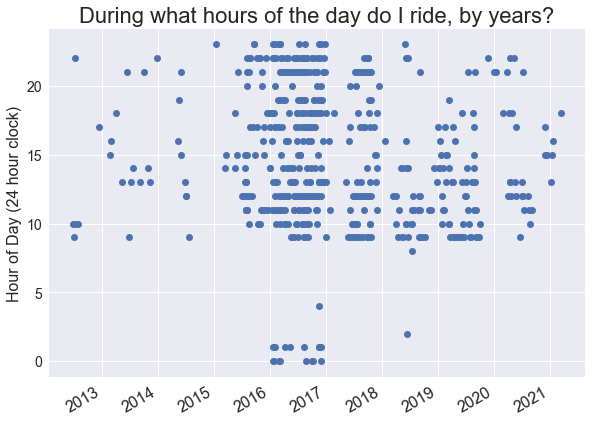

In [452]:
# When not set as the dataframe's index,
# Sort by Activity Date and give it its own object variable for plotting
act.sort_values('Activity Date', inplace=True)
Activity_Date = act['Activity Date']
#Activity_Month = Activity_Date.dt.month
Activity_Hour = Activity_Date.dt.hour

plt.plot_date(Activity_Date, Activity_Hour)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('During what hours of the day do I ride, by years?', size=22)
plt.xlabel('')
plt.xticks(size=16)
plt.ylabel('Hour of Day (24 hour clock)', size=16)
plt.yticks(size=14)
plt.show()

_**"Looks like at least I'm getting sleep in that dead zone, where few rides end before 9-ish. I did like me some night rides in 2017!"**_

##### Do you have tables installed?

We'll use Python packaged _tables_ with indexing by our datetime. You will have to install it if you don't have it. (Note it generally comes included with Anaconda)

To install it, open a new Terminal window and enter this code after the '#' at the prompt (commented out for reference only here).

In [353]:
#!pip install tables

In [453]:
# Only now that we've got our datetime data type, we can
# set Activity Date as our index to slice and dice by it using date time functions
act = act.set_index('Activity Date')
act

,Activity ID,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,Filename,...,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged,Activity Date_Raw
Activity Date,,,,,,,,,,,,,,,,,,,,,
2012-06-30 10:02:42,12076417,"Jun 30, 2012",Ride,NaN,6923,31.55,NaN,False,NaN,activities/12076417.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jun 30, 2012, 10:02:42 AM"
2012-07-02 09:32:05,12276466,"Jul 2, 2012",Ride,NaN,7810,38.41,NaN,False,Ruby,activities/12276466.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 2, 2012, 9:32:05 AM"
2012-07-11 10:32:59,13093736,"Jul 11, 2012 Kelly & Forbidden Drive",Ride,NaN,9117,34.82,NaN,False,Ruby,activities/13093736.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 11, 2012, 10:32:59 AM"
2012-07-12 22:46:34,13229761,"Jul 12, 2012 Wiss",Ride,NaN,6648,18.74,NaN,False,Ruby,activities/13229761.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 12, 2012, 10:46:34 PM"
2012-07-28 10:25:56,15031741,"Jul 28, 2012",Ride,NaN,7978,29.41,NaN,False,Ruby,activities/15031741.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 28, 2012, 10:25:56 AM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 15:31:48,4463191789,Do my best thinking on a bike,Ride,NaN,3536,9.04,NaN,False,Stumpjumper,activities/4463191789.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dec 12, 2020, 3:31:48 PM"
2021-01-07 13:14:55,4582868370,Trainer YouTube hour,Ride,NaN,10026,0.34,NaN,False,Ruby,activities/4582868370.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jan 7, 2021, 1:14:55 PM"
2021-01-16 15:36:00,4931116010,Geeky YouTube trainer sesh,Ride,Disrupt TV,0,0.00,NaN,False,Ruby,activities/4931116010.gpx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jan 16, 2021, 3:36:00 PM"


##### Note 24 Hour Clock format
If you haven't served in armed forces or like me you need a cheat sheet to brush up on converting, I found to be helpful this [freeCodeCamp converter](https://www.freecodecamp.org/news/mathematics-converting-am-pm-to-24-hour-clock/).

In [454]:
# Another way to check your index is datetime now before moving ahead
# If it's not pandas.core.indexes.datetimes.DatetimeIndex then you'll have errors ahead of you
type(act.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [455]:
# To warmup, and validate further, how often did I ride during lunch, def as between 11:00AM and 12:59PM?
nooners = act.between_time('11:00', '13:00', include_end=False)
index = nooners.index
NumNooners = len(index)
NumNooners

135

In [456]:
# How often did I ride before 8:00AM ?
early = act.between_time('00:00', '8:00', include_end=False)
index = early.index
NumEarly = len(index)
NumEarly

# Wow, very few. 
# This tells me the Activity Date is more than likely the end time rather than start time.

18

In [457]:
# View the early rides
early[['Activity Date_Raw','Activity Name','Activity Description']]

,Activity Date_Raw,Activity Name,Activity Description
Activity Date,,,
2016-01-21 00:09:42,"Jan 21, 2016, 12:09:42 AM",Girls night with Emily,NaN
2016-01-23 01:12:33,"Jan 23, 2016, 1:12:33 AM",Mac-n-cheese power is too powerful,Ladies night series w/ Emily
2016-01-28 00:00:39,"Jan 28, 2016, 12:00:39 AM",Zwift - Watopia - 12wk FTP Builder (advanced) ...,NaN
2016-02-04 01:22:07,"Feb 4, 2016, 1:22:07 AM",Zwift - Watopia - 12wk FTP Builder (advanced) ...,NaN
2016-02-28 00:00:00,"Feb 28, 2016, 12:00:00 AM",Evening Ride,NaN
...,...,...,...
2016-11-18 01:46:32,"Nov 18, 2016, 1:46:32 AM","Monsters, Inc.",NaN
2016-11-19 04:00:09,"Nov 19, 2016, 4:00:09 AM",Night Ride TVD meeting,NaN
2016-11-30 01:23:19,"Nov 30, 2016, 1:23:19 AM",Evening Ride,NaN


In [458]:
# If we extend early timeframe to account for end time,
# we expect to get more, with many rides ending with my work start time at 8:30 or 9AM weekdays

# How often did I ride before 9:30AM ?
early = act.between_time('00:00', '9:30', include_end=True)
index = early.index
NumEarly = len(index)
NumEarly

23

In [459]:
# Still not many; let's view the updated early rides
early[['Activity Date_Raw','Activity Name','Activity Description']]

,Activity Date_Raw,Activity Name,Activity Description
Activity Date,,,
2014-07-22 09:04:08,"Jul 22, 2014, 9:04:08 AM",Morning Ride,NaN
2016-01-21 00:09:42,"Jan 21, 2016, 12:09:42 AM",Girls night with Emily,NaN
2016-01-23 01:12:33,"Jan 23, 2016, 1:12:33 AM",Mac-n-cheese power is too powerful,Ladies night series w/ Emily
2016-01-28 00:00:39,"Jan 28, 2016, 12:00:39 AM",Zwift - Watopia - 12wk FTP Builder (advanced) ...,NaN
2016-02-04 01:22:07,"Feb 4, 2016, 1:22:07 AM",Zwift - Watopia - 12wk FTP Builder (advanced) ...,NaN
...,...,...,...
2016-11-30 01:23:19,"Nov 30, 2016, 1:23:19 AM",Evening Ride,NaN
2016-12-01 00:14:07,"Dec 1, 2016, 12:14:07 AM",Evening Ride,NaN
2018-06-13 02:01:49,"Jun 13, 2018, 2:01:49 AM",Night Ride,#pizzaride


#### Alright can we dig into months?

Following Larry's advice, let's take a different LOOK at my ride data now and use its datetime index.

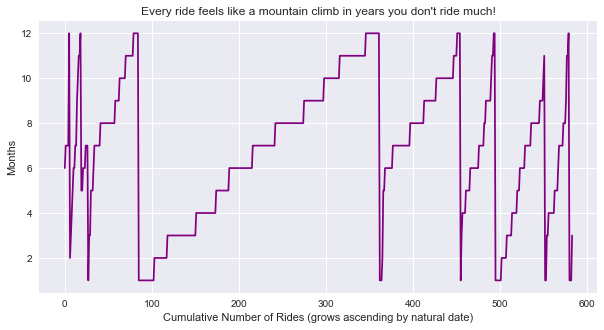

In [488]:
# Remember mpl_dates is matplotlib.dates

# Set the figure and axes
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set(xlabel='Cumulative Number of Rides (grows ascending by natural date)', ylabel='Months', title="Every ride feels like a mountain climb in years you don't ride much!")

# This time we'll plot the activity date by using it as datetime index
ax1.plot(act.index.month, color='purple')

plt.show()

#### From this we can actually infer the years visually, without showing them explicitly
What I mean is, do you see the cycles run January, February (2) up through December (12) vertically, as time moves forward horizontally where we follow my number of total rides posted on Strava from left to right.

Counting the December peaks on the graphs tells us there are eight years plotted, and the more gradually ascending years were clearly when I rode my bike. Year three to four I was active, as appears from 100 rides to about 360 rides, whereas the annual trend wains towards today where I haven't posted many rides during the pandemic and the angle inching towards 600 appears to want to nearly move backwards!  

_Let's see if I can get this to 1,000 before 2025!_ We're at almost a standstill since since January 2021, or peak 8!

### Calculating the Time of Sunrises on each Ride Day

_Hey there, I'm working on this part, but don't get **too** excited about sunrises just yet. We all needs goals!_

Yes this is the best part so I won't hold this back. I decided to calculate sunrise times corresponding to my ride days, after some minimal internet research.
Using [NOAA Global Monitoring Laboratory Solar Calculation](https://www.esrl.noaa.gov/gmd/grad/solcalc/calcdetails.html)

There you can download and view their Solar Calculation workbooks (Day, Year) and explore.
We'll borrow __with tremendous graditude and credit to them__ only the variables and replicate calculations we need and incorporate them here. (Fingers crossed!)

#### Let's get back to our goal of calculating sunrise
From the looks of this we many need to dip into the Strava GPX files or revisit the API for location values.

For now though, we'll approximate by assuming most rides occured around my home base of Philadelphia.
We'll take a standard geo point for the city, for my privacy sake, and calculate sunrise using that as a first pass.

Huge hat tip is in order for [@procrastilearner's blog post and code on Killing Time with Recreational Math Calculate Sunrise and Sunset Times using Python](https://steemit.com/steemstem/@procrastilearner/killing-time-with-recreational-math-calculate-sunrise-and-sunset-times-using-python).

In [482]:
# Alert: Reinstated Index!
# I've removed the index on Act Date for now, 
# to more easily calculate sunrise by calling on this column
#act['Activity Date']

In [483]:
# Just going to leave this commented out for now (intended for calculating sunrise)
# Set our place for all rides
# Philadelphia, Pennsylvania, United States
#latitude_deg =39.952583
#longitude_deg =-75.165222
#timezone = -5.0 # (not during Daylight saving time)
#timezone = -4.0 # (during Daylight saving time)
# Daylight Savings Time should be taken into account
# Again for this first pass, let's pretend we don't practice that awful thing anyway!

# Philly is on Eastern Time:
# - EST - Eastern Standard Time
# - EDT - Eastern Daylight Time when daylight saving time is being observed 
# i.e. EDT from mid-March to early November

In [484]:
# Commenting out with a hold on sunrise for now; troubleshooting error needed.
# Select all in code block and press Command+/ to uncomment when ready.
# # Here's their straight up code for TODAY's sunrise in Philly
# # I've gone in and updated for Activity Date, 
# # and I've commented out printed strings we don't need to see

# # **************************************************************************
# # This code is released by Procrastilearner under the CC BY-SA 4.0 license.
# # 
# # Source for the sunrise calculation:
# #     https://en.wikipedia.org/wiki/Sunrise_equation
# # **************************************************************************
# #import time
# #import math
# #import datetime
# #import math
# # *****************************************
# # Some sample locations
# # Toronto Ontario Canada
# #latitude_deg =43.65
# #longitude_deg = -79.38
# #timezone = -4.0 #Daylight Savings Time is in effect, this would be -5 for winter time

# #Whitehorse Yukon Territories Canada
# #latitude_deg =60.7
# #longitude_deg = -135.1
# #timezone = -7.0 #Daylight Savings Time is in effect, this would be -8 for winter time

# #Paris France
# #latitude_deg =48.85
# #longitude_deg = 2.35
# #timezone = 2.0 

# #Hong Kong PRC
# #latitude_deg =22.32
# #longitude_deg =114.1
# #timezone = 8.0 

# #Perth Australia
# #latitude_deg =-31.9
# #longitude_deg =115.9
# #timezone = 8.0 
# # *****************************************

# def date_to_jd(year,month,day):
#     # Convert a date to Julian Day.
#     # Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
#     # 4th ed., Duffet-Smith and Zwart, 2011.
#     # This function extracted from https://gist.github.com/jiffyclub/1294443
#     if month == 1 or month == 2:
#         yearp = year - 1
#         monthp = month + 12
#     else:
#         yearp = year
#         monthp = month
#     # this checks where we are in relation to October 15, 1582, the beginning
#     # of the Gregorian calendar.
#     if ((year < 1582) or
#         (year == 1582 and month < 10) or
#         (year == 1582 and month == 10 and day < 15)):
#         # before start of Gregorian calendar
#         B = 0
#     else:
#         # after start of Gregorian calendar
#         A = math.trunc(yearp / 100.)
#         B = 2 - A + math.trunc(A / 4.)

#     if yearp < 0:
#         C = math.trunc((365.25 * yearp) - 0.75)
#     else:
#         C = math.trunc(365.25 * yearp)
#     D = math.trunc(30.6001 * (monthp + 1))
#     jd = B + C + D + day + 1720994.5
#     return jd    
# # end of date_to_jd    

# pi=3.14159265359

# latitude_radians = math.radians(latitude_deg)
# longitude__radians = math.radians(longitude_deg)

# jd2000 = 2451545 #the julian date for Jan 1 2000 at noon

# # but we don't want TODAY's sunrise, so comment out current...
# #currentDT = datetime.datetime.now()
# #current_year = currentDT.year
# #current_month = currentDT.month
# #current_day = currentDT.day
# #current_hour = currentDT.hour

# # Let's try to insert our Activity Date(s)
# # We're getting an error:
# # ValueError: The truth value of a Series is ambiguous. 
# # Use a.empty, a.bool(), a.item(), a.any() or a.all().
# #currentDT = act['Activity Date']
# # This way tried on year is not working either, same error...
# #current_year = act['Activity Date'].apply(lambda x: x.year) #act['Activity Date'].dt.year
# #current_month = #act['Activity Date'].dt.month
# #current_day = #act['Activity Date'].dt.day
# #current_hour = #act['Activity Date'].dt.hour

# jd_now = date_to_jd(current_year,current_month,current_day)

# n = jd_now - jd2000 + 0.0008

# jstar = n - longitude_deg/360

# M_deg = (357.5291 + 0.98560028 * jstar)%360
# M = M_deg * pi/180

# C = 1.9148 * math.sin(M) + 0.0200 * math.sin(2*M) + 0.0003 * math.sin(3*M)

# lamda_deg = math.fmod(M_deg + C + 180 + 102.9372,360)

# lamda = lamda_deg * pi/180

# Jtransit = 2451545.5 + jstar + 0.0053 * math.sin(M) - 0.0069 * math.sin(2*lamda)

# earth_tilt_deg = 23.44
# earth_tilt_rad = math.radians(earth_tilt_deg)

# sin_delta = math.sin(lamda) * math.sin(earth_tilt_rad)
# angle_delta = math.asin(sin_delta)

# sun_disc_deg =  -0.83
# sun_disc_rad = math.radians(sun_disc_deg)

# cos_omega = (math.sin(sun_disc_rad) - math.sin(latitude_radians) * math.sin(angle_delta))/(math.cos(latitude_radians) * math.cos(angle_delta))

# omega_radians = math.acos(cos_omega)
# omega_degrees = math.degrees(omega_radians)

# #Output section # commented out we don't need to see this
# #print("------------------------------")
# #print("Today's date is " + currentDT.strftime("%Y-%m-%d"))
# #print("------------------------------")
# #("%Y-%m-%d %H:%M")

# # again commented out we don't need to see this
# #print("Latitude =  " + str(latitude_deg))
# #print("Longitude = " + str(longitude_deg))
# #print("Timezone =  " + str(timezone))
# #print("------------------------------")

# Jrise = Jtransit - omega_degrees/360
# numdays = Jrise - jd2000
# numdays =  numdays + 0.5 #offset because Julian dates start at noon
# numdays =  numdays + timezone/24 #offset for time zone
# sunrise = datetime.datetime(2000, 1, 1) + datetime.timedelta(numdays)
# print("Sunrise is at " + sunrise.strftime("%H:%M"))

# Jset = Jtransit + omega_degrees/360
# numdays = Jset - jd2000
# numdays =  numdays + 0.5 #offset because Julian dates start at noon
# numdays =  numdays + timezone/24 #offset for time zone
# sunset = datetime.datetime(2000, 1, 1) + datetime.timedelta(numdays)
# print("Sunset is at  " + sunset.strftime("%H:%M"))
# print("------------------------------")